# Zillow Clustering Project

## Agenda

## Executive Summary

<div class="alert alert-block alert-info"><b>Finish the mvp workflow and then go back and think critically about what you might of missed. The point isn't to doubt yourself; the purpose here is to check your blind spots and see if you can't find more information or insights that will help you to deliver better results.

Better yet, and this cannot be stressed enough, don't ask yourself these questions, but bring them up in conversation with peers, experts in other fields, or even complete strangers -- anyone with a different point of view is going to be able to help you to see what things you are taking for granted</div>



## Description: 
- Zillow: What is driving the errors in the Zestimates?
- The presentation will consist of a notebook demo of the discoveries you made and work you have done related to uncovering what the drivers of the error in the zestimate is.


## Problem Statement
- What is driving the error in the Zestimate (logerror)?
- Are there features that will produce a smaller average error?
- What groups are in the data?
- Does using these groups help remove the noise in the model?

#### Domain Research
- What is a single unit housing unit?
    - https://www.investopedia.com/terms/h/housingunits.asp
- What is fips?
    - https://en.wikipedia.org/wiki/FIPS_county_code
- What is the min/max tax rate by county in US?
    - https://www.attomdata.com/news/market-trends/figuresfriday/top-10-u-s-counties-with-the-greatest-effective-tax-rates/
- Understanding Zillow Zestimate
    - https://www.zillow.com/zestimate/
    - https://www.youtube.com/watch?v=rfWzMI_VwTQ
    - https://www.kaggle.com/c/zillow-prize-1/overview

<div class="alert alert-block alert-info"><b>

## PLAN

**MVP Questions to answer:**
- Use clustering to identify new features
- Determine the baseline logerror
- Produce a model that has less logerror than baseline
- Determine key drivers of error

**Brainstorm:**    
- MVP all counties
- features to add:
    - county name column, remove fips, get dummies for clustering use
    - combined bedroom/bathroom ratio? drop bathroom, keep bedroom
    - cluster on size with lot size, finished sq ft, and ????
    - convert year build to age (current date - yearbuilt)
    - does age correlate with size? if so maybe cluster age with size columns above
    - cluster on tax value? taxamount, taxvaluedollarcnt, landtaxvaluedollarcnt, structuretaxvaluedollarcnt?
- 2nd run add tax percent rate column and remove outliers above 6.6% and below 1% 
    - first outlier method removed too many observations, this was done instead
    
- 2nd run through seperate models by county?


Audience: Zillow Data Science Team    
Setting: Professional


<div class="alert alert-block alert-info"><b>

## Acquire
DELIVERABLES: 
- Data is collected from the Codeup cloud database with an appropriate SQL query
- Define single unit property

Summary of query requirements and creation:



****
Acquire    
**take aways**
1. could fireplace, garage, pool, hottub, deck be made to 0 or 1 then summed as "plus_item" column?
    - this would assume null values do not have the feature, as opposed to feature is present but not noted
2. drop features with 70% or more missing values to start
3. most rows have 32-34 columns with missing values
****

<div class="alert alert-block alert-info"><b>Prep needs additional summary on handling nulls and removing outliers</div>

## Preparation
DELIVERABLES:
- Column data types are appropriate for the data they contain
- Missing values are investigated and handled
- Outliers are investigated and handled

Summary of handling nulls, outliers, creating additional features, dropping columns/rows

Data split into X (features) and y (target) dataframes for Train, Validate, and Test
Data for X dataframes scaled for cluster exploration and modeling


****
Prepare     
**take aways**    

**This is deffinition used in previous project**   

Determine deffinition of single property used article by James Chen Updated Sep 11, 2020 What Is a Housing Unit? "The term housing unit refers to a single unit within a larger structure that can be used by an individual or household to eat, sleep, and live. The unit can be in any type of residence such as a house, apartment, mobile home, or may also be a single unit in a group of rooms. Essentially, a housing unit is deemed to be a separate living quarter where the occupants live and eat separately from other residents of the structure or building. They also have direct access from the building's exterior or through a common hallway."
https://www.investopedia.com/terms/h/housingunits.asp   

**In my opinion deffinition should include condo, townhouse, any unit that can be sold to an individual owner. So my deffinition will include townhouse, condo, ect. but not commercial, business, land only, etc. **   

This site has the property use codes for LA county https://www.titleadvantage.com/mdocs/LA%20County%20Use%20Codes%20nm.pdf   
looking at the common use codes for Duplex, Triplex, and Quadplex these codes indicate the units are multi-family/income properties or retail/store properties so these will be excluded

Identify Properties in the Database: Based on the above definition some categories do not fit brief   
Propertylandusetypeid | propertylandusedesc    
No 31 Commercial/Office/Residential Mixed Used (not a residence)    
No 46 Multi-Story Store (not a residence)   
No 47 Store/Office (Mixed Use) (not a residence)    
No 246 Duplex (2 Units, Any Combination)    
No 247 Triplex (3 Units, Any Combination)   
No 248 Quadruplex (4 Units, Any Combination)   
260 Residential General    
261 Single Family Residential   
262 Rural Residence   
263 Mobile Home   
264 Townhouse   
No 265 Cluster Home    
266 Condominium    
No 267 Cooperative (become shareholder not owner)   
268 Row House       
No 269 Planned Unit Development   
No 270 Residential Common Area (propterty feature)    
No 271 Timeshare (become shareholder not owner)    
273 Bungalow      
274 Zero Lot Line   
275 Manufactured, Modular, Prefabricated Homes   
276 Patio Home    
279 Inferred Single Family Residential      
No 290 Vacant Land - General (not a residence)   
No 291 Residential Vacant Land (not a residence)   

So we will keep only those where propertylandusetypeid = ('260', '261', '262', '263', '264', '266', '268', '273', '274', '275', '276', '279')  

**acquire function updated to filter only for these**
new shape = (71789, 70)
****

<div class="alert alert-block alert-info"><b>histograms are produced for full dataset
for presentation separate this function out so only produced on demand</div>

(62481, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62481 entries, 0 to 71788
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      62481 non-null  int64  
 1   bathroomcnt                   62481 non-null  float64
 2   bedroomcnt                    62481 non-null  float64
 3   calculatedfinishedsquarefeet  62481 non-null  float64
 4   fullbathcnt                   62481 non-null  float64
 5   latitude                      62481 non-null  float64
 6   longitude                     62481 non-null  float64
 7   lotsizesquarefeet             62481 non-null  float64
 8   rawcensustractandblock        62481 non-null  float64
 9   regionidzip                   62481 non-null  float64
 10  roomcnt                       62481 non-null  float64
 11  unitcnt                       62481 non-null  float64
 12  yearbuilt                     62481 non-null  fl

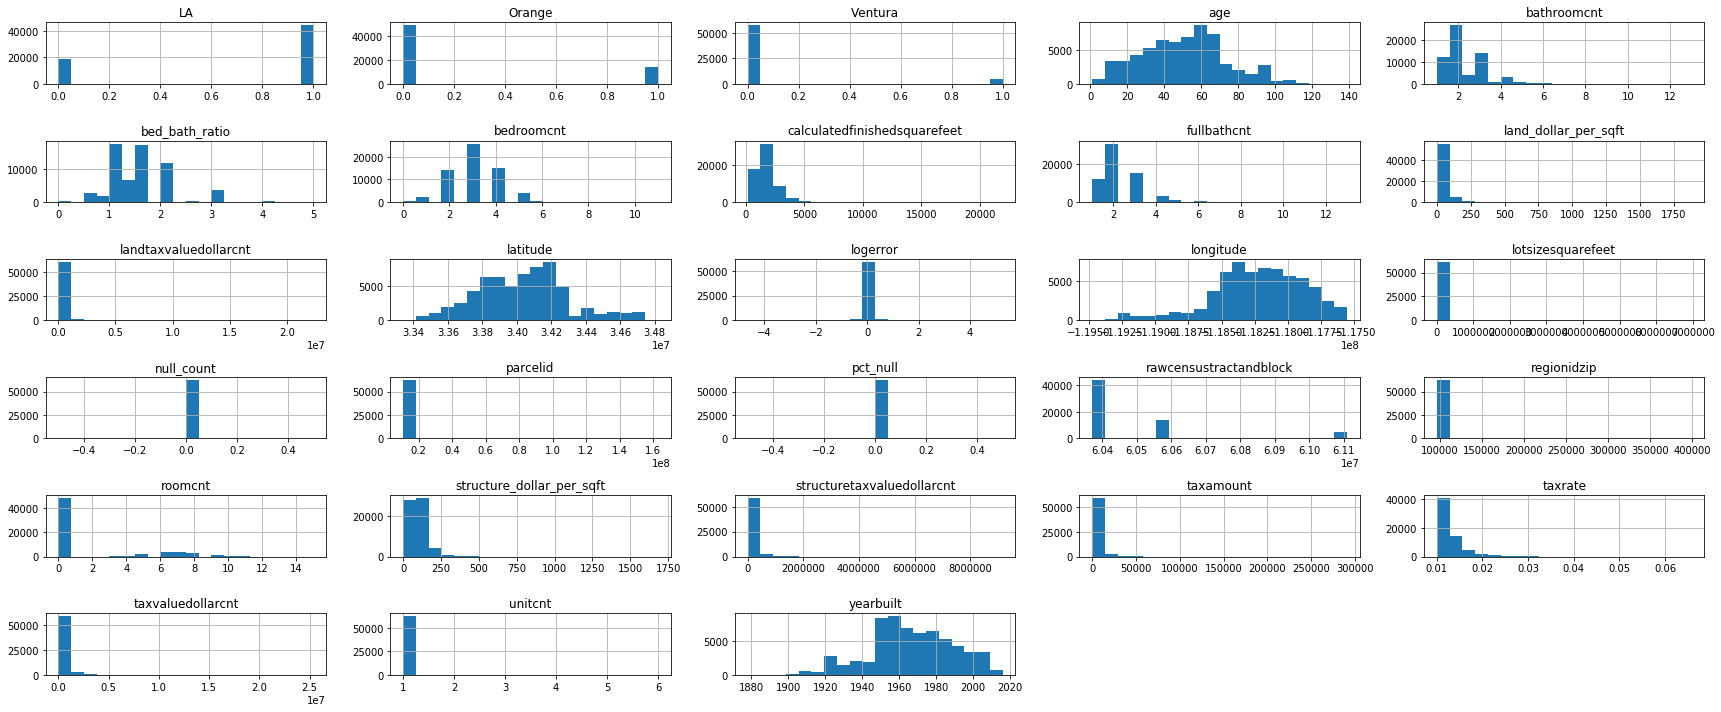

None [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa66d48db10>
  <matplotlib.axes._subplots.AxesSubplot object at 0x7fa653cafd90>]] None
(34988, 21) (14996, 21) (12497, 21)
(34988, 21) (14996, 21) (12497, 21)


In [1]:
import wrangle_zillow
df, X_train, y_train, X_validate, y_validate, X_test, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_zillow.wrangle_zillow_cluster()
# this also prints summary data for the full dataset that was used in identifying nulls and outliers

<div class="alert alert-block alert-info"><b>Explore needs cleaned up and funcions created and called. Also need to add interaction between indenpendent varialbes and target. Add 4th clustering model on location?</div>

## Exploration
DELIVERABLES:      
**- Interaction between independent variables and the target variable is explored using visualization and statistical testing**
- Clustering is used to explore the data
- A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful
- At least 3 combinations of features for clustering should be tried



In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import explore

In [3]:
X_train_scaled.columns

Index(['bedroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled',
       'fullbathcnt_scaled', 'lotsizesquarefeet_scaled', 'roomcnt_scaled',
       'unitcnt_scaled', 'structuretaxvaluedollarcnt_scaled',
       'taxvaluedollarcnt_scaled', 'taxamount_scaled', 'age_scaled',
       'taxrate_scaled', 'structure_dollar_per_sqft_scaled',
       'land_dollar_per_sqft_scaled', 'bed_bath_ratio_scaled'],
      dtype='object')

cluster on size with lot size, finished sq ft, and ????
does age correlate with size? if so maybe cluster age with size columns above
cluster on tax value? taxamount, taxvaluedollarcnt, landtaxvaluedollarcnt, structuretaxvaluedollarcnt?

#### Does age correlate with size?
1. decided to use calculatedfinishedsquarefeet for size to answer this
2. visualize age and size together (both continuous variables)
3. use scatter plot for chart
4. use stats.pearsonr for hypothesis testing

#### Hypothesis test
Ho: There is no relationship between age and size.     
Ha: There is a relationship between age and size.


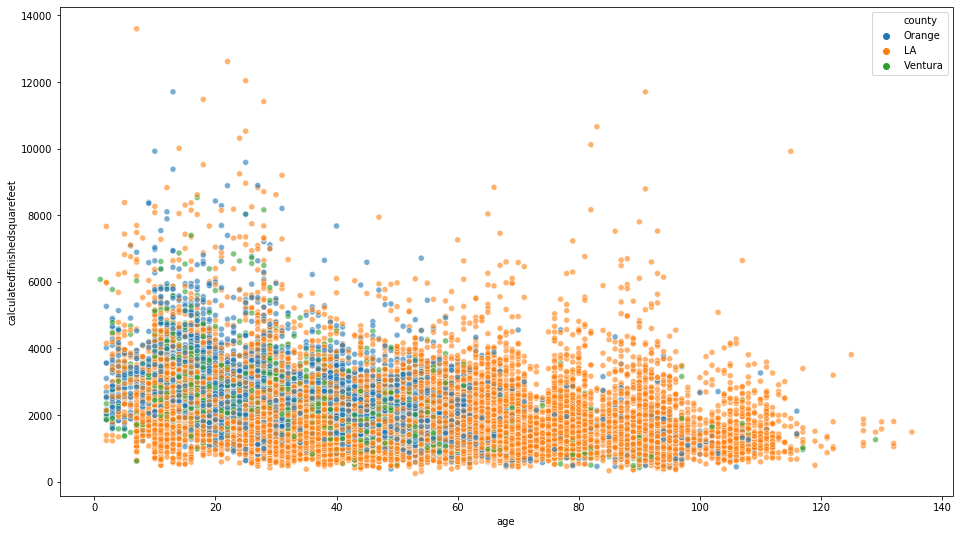

In [4]:
# for final this will need to be a function
plt.figure(figsize=(16, 9))
sns.scatterplot(data=X_train, y='calculatedfinishedsquarefeet', x='age', hue='county', alpha=.6)

Given this visual it may be better to separate by county and retest in next iteration

In [5]:
# for final this will need to be a function
alpha = .05
x = X_train.age
y = X_train.calculatedfinishedsquarefeet
r, p = stats.pearsonr(x, y)
r, p

(-0.32762428768412005, 0.0)

The p-value is less than alpha so we reject the null hypothesis, though the r value is not far from zero and is negative, which would indicate a weak negative linear correlation. 

Based on correlation of age and size (though weak) will try clustering on calculatedfinishedsquarefeet, lotsizesquarefeet, and age. 

     k         sse
0    2  507.868148
1    3  337.250255
2    4  240.743544
3    5  204.311993
4    6  172.657708
5    7  153.009701
6    8  137.255673
7    9  123.882814
8   10  112.464345
9   11  102.757016
10  12   95.200190
11  13   88.621786
12  14   83.301819
13  15   78.799583
14  16   74.769471
15  17   70.798556
16  18   66.966259
17  19   63.910760


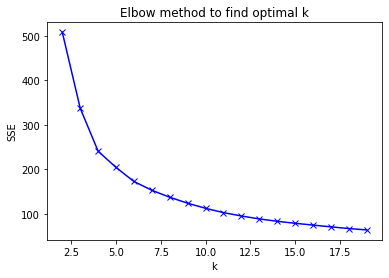

In [6]:
cluster_vars = ['calculatedfinishedsquarefeet_scaled', 'lotsizesquarefeet_scaled', 'age_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars)
# based on this will use 5 as k value

In [7]:
k=5
cluster_col_name = 'size_cluster'
train_clusters, kmeans = explore.run_kmeans(X_train_scaled, X_train, cluster_vars, k, cluster_col_name)

In [8]:
train_clusters.size_cluster.value_counts()
# pretty good dispersal of values

4    10285
1     8637
0     7917
3     4906
2     3243
Name: size_cluster, dtype: int64

In [9]:
kmeans

KMeans(n_clusters=5, random_state=13)

In [10]:
centroids = explore.get_centroids(kmeans, cluster_vars, cluster_col_name)

In [11]:
centroids

,size_cluster,centroid_calculatedfinishedsquarefeet_scaled,centroid_lotsizesquarefeet_scaled,centroid_age_scaled
0,0,0.102197,0.009289,0.241078
1,1,0.117009,0.004907,0.371237
2,2,0.097274,0.001157,0.692747
3,3,0.204023,0.004147,0.114555
4,4,0.090271,0.001274,0.488372


In [12]:
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters, X_train_scaled, centroids, cluster_col_name)

In [13]:
X_train.head()

,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,latitude,longitude,lotsizesquarefeet,roomcnt,unitcnt,structuretaxvaluedollarcnt,taxvaluedollarcnt,...,Ventura,age,taxrate,structure_dollar_per_sqft,land_dollar_per_sqft,bed_bath_ratio,size_cluster,centroid_calculatedfinishedsquarefeet_scaled,centroid_lotsizesquarefeet_scaled,centroid_age_scaled
14482,4.0,1662.0,2.0,33418044.0,-117600891.0,7000.0,4.0,1.0,111651.0,704583.0,...,0,56.0,0.010148,67.178700,84.704571,2.0,1,0.117009,0.004907,0.371237
65507,2.0,1338.0,2.0,33915894.0,-117914469.0,7292.0,6.0,1.0,79461.0,405573.0,...,0,61.0,0.011856,59.387892,44.721887,1.0,4,0.090271,0.001274,0.488372
7476,4.0,1950.0,2.0,33993611.0,-118332723.0,7001.0,0.0,1.0,37459.0,63943.0,...,0,94.0,0.014088,19.209744,3.782888,2.0,2,0.097274,0.001157,0.692747
10724,2.0,1323.0,2.0,33613296.0,-117614948.0,3275.0,0.0,1.0,145968.0,369049.0,...,0,27.0,0.012767,110.331066,68.116336,0.8,0,0.102197,0.009289,0.241078
323,0.0,524.0,1.0,33771300.0,-118195000.0,14974.0,0.0,1.0,38090.0,52943.0,...,0,52.0,0.014658,72.690840,0.991919,0.0,1,0.117009,0.004907,0.371237


In [14]:
X_train_scaled.head()

,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,roomcnt_scaled,unitcnt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,age_scaled,taxrate_scaled,structure_dollar_per_sqft_scaled,land_dollar_per_sqft_scaled,bed_bath_ratio_scaled,size_cluster,centroid_calculatedfinishedsquarefeet_scaled,centroid_lotsizesquarefeet_scaled,centroid_age_scaled
14482,0.444444,0.106319,0.1,0.000970,0.285714,0.0,0.014128,0.029104,0.024979,0.410448,0.002653,0.048360,0.044992,0.40,1,0.117009,0.004907,0.371237
65507,0.222222,0.082060,0.1,0.001012,0.428571,0.0,0.010050,0.016566,0.016511,0.447761,0.033317,0.042739,0.023754,0.20,4,0.090271,0.001274,0.488372
7476,0.444444,0.127883,0.1,0.000970,0.000000,0.0,0.004729,0.002241,0.002382,0.694030,0.073410,0.013756,0.002007,0.40,2,0.097274,0.001157,0.692747
10724,0.222222,0.080937,0.1,0.000436,0.000000,0.0,0.018476,0.015035,0.016161,0.194030,0.049674,0.079489,0.036181,0.16,0,0.102197,0.009289,0.241078
323,0.000000,0.021114,0.0,0.002114,0.000000,0.0,0.004809,0.001780,0.001930,0.380597,0.083630,0.052336,0.000525,0.00,1,0.117009,0.004907,0.371237


In [15]:
X_train_scaled.columns

Index(['bedroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled',
       'fullbathcnt_scaled', 'lotsizesquarefeet_scaled', 'roomcnt_scaled',
       'unitcnt_scaled', 'structuretaxvaluedollarcnt_scaled',
       'taxvaluedollarcnt_scaled', 'taxamount_scaled', 'age_scaled',
       'taxrate_scaled', 'structure_dollar_per_sqft_scaled',
       'land_dollar_per_sqft_scaled', 'bed_bath_ratio_scaled', 'size_cluster',
       'centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_age_scaled'],
      dtype='object')

     k         sse
0    2  234.796278
1    3  174.898380
2    4  148.005582
3    5  129.370159
4    6  115.793336
5    7  104.798405
6    8   96.106406
7    9   88.598130
8   10   81.806219
9   11   76.295564
10  12   71.789777
11  13   67.393734
12  14   63.885462
13  15   60.032129
14  16   57.392130
15  17   54.742919
16  18   52.310771
17  19   50.103555


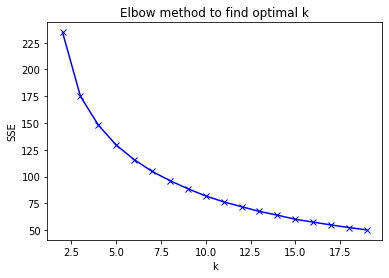

In [16]:
# dollar amount clustering
# use structuretaxvaluedollarcnt, taxvaluedollarcnt, taxamount, structure_dollar_per_sqft, land_dollar_per_sqft, taxrate
cluster_vars2 = ['structuretaxvaluedollarcnt_scaled', 'taxvaluedollarcnt_scaled', 'taxamount_scaled', 'structure_dollar_per_sqft_scaled', 'land_dollar_per_sqft_scaled', 'taxrate_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars2)
# based on this will use 5 as k value

In [17]:
k2=5
cluster_col_name2 = 'dollar_cluster'
train_clusters2, kmeans2 = explore.run_kmeans(X_train_scaled, X_train, cluster_vars2, k2, cluster_col_name2)

In [18]:
train_clusters2.dollar_cluster.value_counts()
# based on this distribution this clustering may not be that helpful

4    22834
2     5885
1     5304
0      573
3      392
Name: dollar_cluster, dtype: int64

In [19]:
kmeans2

KMeans(n_clusters=5, random_state=13)

In [20]:
centroids2 = explore.get_centroids(kmeans2, cluster_vars2, cluster_col_name2)

In [21]:
centroids2

,dollar_cluster,centroid_structuretaxvaluedollarcnt_scaled,centroid_taxvaluedollarcnt_scaled,centroid_taxamount_scaled,centroid_structure_dollar_per_sqft_scaled,centroid_land_dollar_per_sqft_scaled,centroid_taxrate_scaled
0,0,0.009320,0.005288,0.012917,0.032547,0.004983,0.333458
1,1,0.011663,0.005981,0.008539,0.040704,0.004737,0.125491
2,2,0.050637,0.043071,0.043427,0.122805,0.045586,0.034186
3,3,0.188465,0.179011,0.179182,0.267608,0.151870,0.030009
4,4,0.017548,0.015482,0.015654,0.062075,0.018651,0.040575


In [22]:
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters2, X_train_scaled, centroids2, cluster_col_name2)

#### Does bed/bath ratio correlate with age?
1. visualize bed_bath_ratio and age together (both continuous variables)
2. use scatter plot for chart
3. based on chart bin bed_bath ratio and age and visualize
4. use chi squared test to compare 

#### Hypothesis test
Ho: Bed_bath_ratio and age are independent.     
Ha: Bed_bath_ratio and age are dependent.



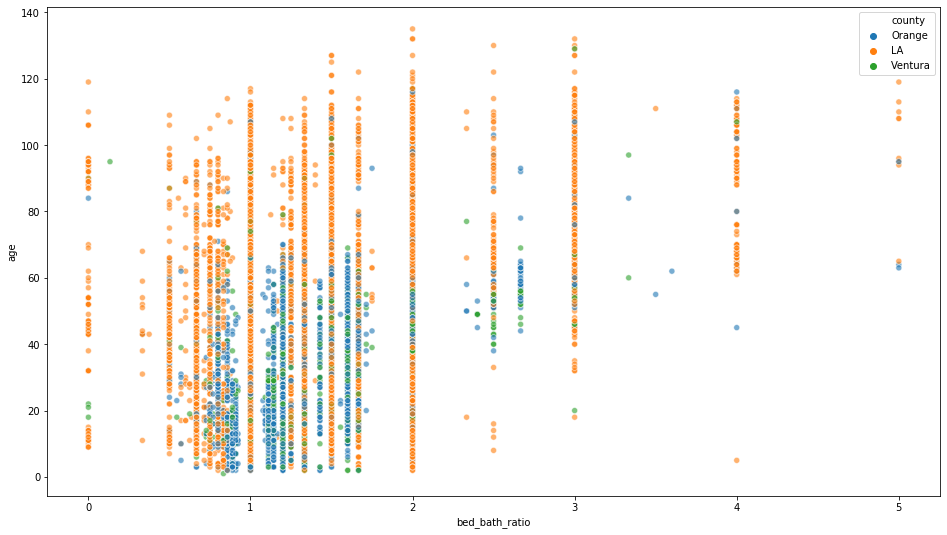

In [23]:
# for final this will need to be a function
plt.figure(figsize=(16, 9))
sns.scatterplot(data=X_train, y='age', x='bed_bath_ratio', hue='county', alpha=.6)

In [24]:
# create binned bed_bath_ratio column
X_train['bb_bin'] = pd.cut(X_train.bed_bath_ratio, bins=[0, 1, 2, 3, 4], labels=['1', '2', '3', '4+'])
# create binned age column by 20 yr groups
X_train['age_bin'] = pd.cut(X_train.age, bins=[0, 20, 40, 60, 80], labels=['<20', '40', '60', '80+'])

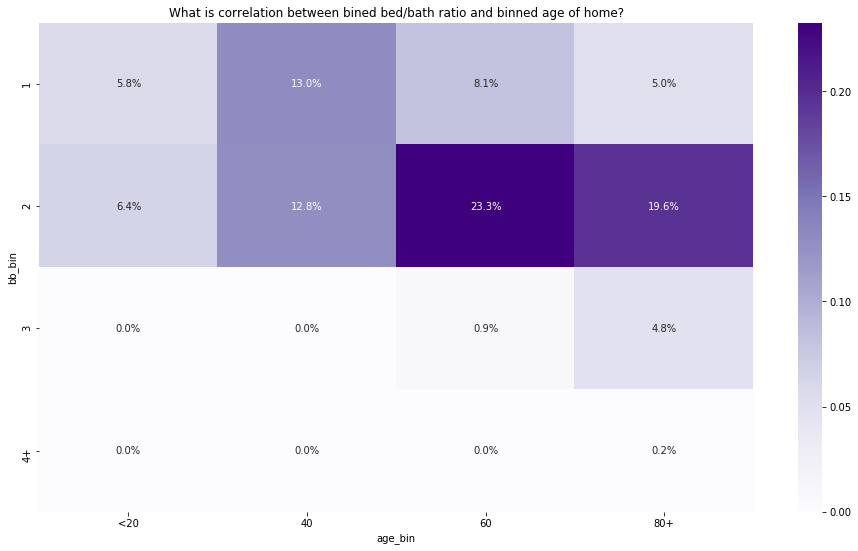

In [25]:
# visualize these 2 categorical variables together
# Heatmap of bined values (Categorical and Categorical)
plt.figure(figsize=(16,9))
ctab = pd.crosstab(X_train.bb_bin, X_train.age_bin, normalize=True)
sns.heatmap(ctab, cmap='Purples', annot=True, fmt='.1%')
plt.title('What is correlation between bined bed/bath ratio and binned age of home?')
plt.show()

In [26]:
# Hypothesis Test

alpha = 0.05
contingency_table = pd.crosstab(X_train.bb_bin, X_train.age_bin)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

if p < alpha:
    print("We reject the null hypothesis")
    print(f'chi^2 = {chi2:.4f}')
    print(f'p     = {p:.4f}')
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis
chi^2 = 5105.3786
p     = 0.0000


In [27]:
X_train_scaled.columns

Index(['bedroomcnt_scaled', 'calculatedfinishedsquarefeet_scaled',
       'fullbathcnt_scaled', 'lotsizesquarefeet_scaled', 'roomcnt_scaled',
       'unitcnt_scaled', 'structuretaxvaluedollarcnt_scaled',
       'taxvaluedollarcnt_scaled', 'taxamount_scaled', 'age_scaled',
       'taxrate_scaled', 'structure_dollar_per_sqft_scaled',
       'land_dollar_per_sqft_scaled', 'bed_bath_ratio_scaled', 'size_cluster',
       'centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_age_scaled',
       'dollar_cluster', 'centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled',
       'centroid_land_dollar_per_sqft_scaled', 'centroid_taxrate_scaled'],
      dtype='object')

     k          sse
0    2  1300.124816
1    3   966.423970
2    4   729.274062
3    5   620.983758
4    6   504.502151
5    7   439.288474
6    8   372.924984
7    9   318.994397
8   10   279.883692
9   11   247.447023
10  12   225.696656
11  13   206.809993
12  14   188.459407
13  15   165.597344
14  16   154.562002
15  17   142.728382
16  18   133.111669
17  19   119.352740


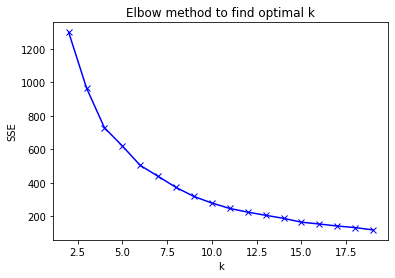

In [28]:
# create rooms cluster
# use bedroomcnt, fullbathcnt, roomcnt, structure_dollar_per_sqft, land_dollar_per_sqft, taxrate
cluster_vars3 = ['bedroomcnt_scaled', 'fullbathcnt_scaled', 'roomcnt_scaled', 'bed_bath_ratio_scaled']
explore.elbow_plot(X_train_scaled, cluster_vars3)
# based on this will use 6 as k value

In [29]:
k3=6
cluster_col_name3 = 'rooms_cluster'
train_clusters3, kmeans3 = explore.run_kmeans(X_train_scaled, X_train, cluster_vars3, k3, cluster_col_name3)

In [30]:
train_clusters3.rooms_cluster.value_counts()
# pretty good dispersal of values

0    14247
5     5675
4     4663
2     4597
3     3601
1     2205
Name: rooms_cluster, dtype: int64

In [31]:
kmeans3

KMeans(n_clusters=6, random_state=13)

In [32]:
centroids3 = explore.get_centroids(kmeans3, cluster_vars3, cluster_col_name3)

In [33]:
centroids3

,rooms_cluster,centroid_bedroomcnt_scaled,centroid_fullbathcnt_scaled,centroid_roomcnt_scaled,centroid_bed_bath_ratio_scaled
0,0,0.380837,0.139952,0.000050,0.290868
1,1,0.505115,0.348798,0.001879,0.204108
2,2,0.315287,0.081058,0.414466,0.312805
3,3,0.462814,0.157809,0.573687,0.319714
4,4,0.271976,0.000279,0.000245,0.487719
5,5,0.192677,0.099366,0.002240,0.178146


In [34]:
X_train, X_train_scaled = explore.add_to_train(X_train, train_clusters3, X_train_scaled, centroids3, cluster_col_name3)

In [35]:
# 2nd iteration: add area/location cluster with longitude, latitude, encoded counties?

<div class="alert alert-block alert-info"><b>Modeling needs various X_train dataframe creation moved to model.py and then try different types of models?</div>

## Modeling Stage
DELIVERABLES: 
- At least 4 different models are created and their performance is compared
- One model is the distinct combination of algorithm, hyperparameters, and features
- Best practices on data splitting are followed


In [36]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import model

In [ ]:
X_train_scaled.columns

In [38]:
# try a lineat regression model with original (not clustered) features
XtrainSO = X_train_scaled.drop(columns=['size_cluster',
       'centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_age_scaled',
       'dollar_cluster', 'centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled',
       'centroid_land_dollar_per_sqft_scaled', 'centroid_taxrate_scaled',
       'rooms_cluster', 'centroid_bedroomcnt_scaled',
       'centroid_fullbathcnt_scaled', 'centroid_roomcnt_scaled',
       'centroid_bed_bath_ratio_scaled'])
XtrainSO.head()

,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,roomcnt_scaled,unitcnt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,age_scaled,taxrate_scaled,structure_dollar_per_sqft_scaled,land_dollar_per_sqft_scaled,bed_bath_ratio_scaled
14482,0.444444,0.106319,0.1,0.000970,0.285714,0.0,0.014128,0.029104,0.024979,0.410448,0.002653,0.048360,0.044992,0.40
65507,0.222222,0.082060,0.1,0.001012,0.428571,0.0,0.010050,0.016566,0.016511,0.447761,0.033317,0.042739,0.023754,0.20
7476,0.444444,0.127883,0.1,0.000970,0.000000,0.0,0.004729,0.002241,0.002382,0.694030,0.073410,0.013756,0.002007,0.40
10724,0.222222,0.080937,0.1,0.000436,0.000000,0.0,0.018476,0.015035,0.016161,0.194030,0.049674,0.079489,0.036181,0.16
323,0.000000,0.021114,0.0,0.002114,0.000000,0.0,0.004809,0.001780,0.001930,0.380597,0.083630,0.052336,0.000525,0.00


In [41]:
# try a lineat regression model with original and size cluster features
XtrainSS = X_train_scaled.drop(columns=['dollar_cluster', 'centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled',
       'centroid_land_dollar_per_sqft_scaled', 'centroid_taxrate_scaled',
       'rooms_cluster', 'centroid_bedroomcnt_scaled',
       'centroid_fullbathcnt_scaled', 'centroid_roomcnt_scaled',
       'centroid_bed_bath_ratio_scaled'])
XtrainSS.head()

,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,roomcnt_scaled,unitcnt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,age_scaled,taxrate_scaled,structure_dollar_per_sqft_scaled,land_dollar_per_sqft_scaled,bed_bath_ratio_scaled,size_cluster,centroid_calculatedfinishedsquarefeet_scaled,centroid_lotsizesquarefeet_scaled,centroid_age_scaled
14482,0.444444,0.106319,0.1,0.000970,0.285714,0.0,0.014128,0.029104,0.024979,0.410448,0.002653,0.048360,0.044992,0.40,1,0.117009,0.004907,0.371237
65507,0.222222,0.082060,0.1,0.001012,0.428571,0.0,0.010050,0.016566,0.016511,0.447761,0.033317,0.042739,0.023754,0.20,4,0.090271,0.001274,0.488372
7476,0.444444,0.127883,0.1,0.000970,0.000000,0.0,0.004729,0.002241,0.002382,0.694030,0.073410,0.013756,0.002007,0.40,2,0.097274,0.001157,0.692747
10724,0.222222,0.080937,0.1,0.000436,0.000000,0.0,0.018476,0.015035,0.016161,0.194030,0.049674,0.079489,0.036181,0.16,0,0.102197,0.009289,0.241078
323,0.000000,0.021114,0.0,0.002114,0.000000,0.0,0.004809,0.001780,0.001930,0.380597,0.083630,0.052336,0.000525,0.00,1,0.117009,0.004907,0.371237


In [43]:
# try a lineat regression model with original and dollar cluster features
XtrainSD = X_train_scaled.drop(columns=['size_cluster',
       'centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_age_scaled',
       'rooms_cluster', 'centroid_bedroomcnt_scaled',
       'centroid_fullbathcnt_scaled', 'centroid_roomcnt_scaled',
       'centroid_bed_bath_ratio_scaled'])
XtrainSD.head()

,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,roomcnt_scaled,unitcnt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,age_scaled,...,structure_dollar_per_sqft_scaled,land_dollar_per_sqft_scaled,bed_bath_ratio_scaled,dollar_cluster,centroid_structuretaxvaluedollarcnt_scaled,centroid_taxvaluedollarcnt_scaled,centroid_taxamount_scaled,centroid_structure_dollar_per_sqft_scaled,centroid_land_dollar_per_sqft_scaled,centroid_taxrate_scaled
14482,0.444444,0.106319,0.1,0.000970,0.285714,0.0,0.014128,0.029104,0.024979,0.410448,...,0.048360,0.044992,0.40,4,0.017548,0.015482,0.015654,0.062075,0.018651,0.040575
65507,0.222222,0.082060,0.1,0.001012,0.428571,0.0,0.010050,0.016566,0.016511,0.447761,...,0.042739,0.023754,0.20,4,0.017548,0.015482,0.015654,0.062075,0.018651,0.040575
7476,0.444444,0.127883,0.1,0.000970,0.000000,0.0,0.004729,0.002241,0.002382,0.694030,...,0.013756,0.002007,0.40,1,0.011663,0.005981,0.008539,0.040704,0.004737,0.125491
10724,0.222222,0.080937,0.1,0.000436,0.000000,0.0,0.018476,0.015035,0.016161,0.194030,...,0.079489,0.036181,0.16,4,0.017548,0.015482,0.015654,0.062075,0.018651,0.040575
323,0.000000,0.021114,0.0,0.002114,0.000000,0.0,0.004809,0.001780,0.001930,0.380597,...,0.052336,0.000525,0.00,1,0.011663,0.005981,0.008539,0.040704,0.004737,0.125491


In [45]:
# try a lineat regression model with original and room cluster features
XtrainSR = X_train_scaled.drop(columns=['size_cluster',
       'centroid_calculatedfinishedsquarefeet_scaled',
       'centroid_lotsizesquarefeet_scaled', 'centroid_age_scaled',
       'dollar_cluster', 'centroid_structuretaxvaluedollarcnt_scaled',
       'centroid_taxvaluedollarcnt_scaled', 'centroid_taxamount_scaled',
       'centroid_structure_dollar_per_sqft_scaled',
       'centroid_land_dollar_per_sqft_scaled', 'centroid_taxrate_scaled',])
XtrainSR.head()

,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,roomcnt_scaled,unitcnt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,age_scaled,taxrate_scaled,structure_dollar_per_sqft_scaled,land_dollar_per_sqft_scaled,bed_bath_ratio_scaled,rooms_cluster,centroid_bedroomcnt_scaled,centroid_fullbathcnt_scaled,centroid_roomcnt_scaled,centroid_bed_bath_ratio_scaled
14482,0.444444,0.106319,0.1,0.000970,0.285714,0.0,0.014128,0.029104,0.024979,0.410448,0.002653,0.048360,0.044992,0.40,2,0.315287,0.081058,0.414466,0.312805
65507,0.222222,0.082060,0.1,0.001012,0.428571,0.0,0.010050,0.016566,0.016511,0.447761,0.033317,0.042739,0.023754,0.20,2,0.315287,0.081058,0.414466,0.312805
7476,0.444444,0.127883,0.1,0.000970,0.000000,0.0,0.004729,0.002241,0.002382,0.694030,0.073410,0.013756,0.002007,0.40,0,0.380837,0.139952,0.000050,0.290868
10724,0.222222,0.080937,0.1,0.000436,0.000000,0.0,0.018476,0.015035,0.016161,0.194030,0.049674,0.079489,0.036181,0.16,5,0.192677,0.099366,0.002240,0.178146
323,0.000000,0.021114,0.0,0.002114,0.000000,0.0,0.004809,0.001780,0.001930,0.380597,0.083630,0.052336,0.000525,0.00,5,0.192677,0.099366,0.002240,0.178146


In [47]:
# now a model with all features and clusters
XtrainSALL = X_train_scaled.copy()
XtrainSALL.head()

,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled,fullbathcnt_scaled,lotsizesquarefeet_scaled,roomcnt_scaled,unitcnt_scaled,structuretaxvaluedollarcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,age_scaled,...,centroid_taxvaluedollarcnt_scaled,centroid_taxamount_scaled,centroid_structure_dollar_per_sqft_scaled,centroid_land_dollar_per_sqft_scaled,centroid_taxrate_scaled,rooms_cluster,centroid_bedroomcnt_scaled,centroid_fullbathcnt_scaled,centroid_roomcnt_scaled,centroid_bed_bath_ratio_scaled
14482,0.444444,0.106319,0.1,0.000970,0.285714,0.0,0.014128,0.029104,0.024979,0.410448,...,0.015482,0.015654,0.062075,0.018651,0.040575,2,0.315287,0.081058,0.414466,0.312805
65507,0.222222,0.082060,0.1,0.001012,0.428571,0.0,0.010050,0.016566,0.016511,0.447761,...,0.015482,0.015654,0.062075,0.018651,0.040575,2,0.315287,0.081058,0.414466,0.312805
7476,0.444444,0.127883,0.1,0.000970,0.000000,0.0,0.004729,0.002241,0.002382,0.694030,...,0.005981,0.008539,0.040704,0.004737,0.125491,0,0.380837,0.139952,0.000050,0.290868
10724,0.222222,0.080937,0.1,0.000436,0.000000,0.0,0.018476,0.015035,0.016161,0.194030,...,0.015482,0.015654,0.062075,0.018651,0.040575,5,0.192677,0.099366,0.002240,0.178146
323,0.000000,0.021114,0.0,0.002114,0.000000,0.0,0.004809,0.001780,0.001930,0.380597,...,0.005981,0.008539,0.040704,0.004737,0.125491,5,0.192677,0.099366,0.002240,0.178146


### Train models
***for MVP these are variations on Linear Regression Model altering features**

In [37]:
baseline = model.get_baseline(y_train, y_train.logerror)

Baseline: 0.17218203119083472


In [40]:
MSE_m1SO = model.linear_reg_model(XtrainSO, y_train.logerror)
MSE_m1SO

0.17174633440556805

In [42]:
MSE_m2SS = model.linear_reg_model(XtrainSS, y_train.logerror)
MSE_m2SS

0.17170114795647076

In [44]:
MSE_m3SD = model.linear_reg_model(XtrainSD, y_train.logerror)
MSE_m3SD

0.17168297679053238

In [46]:
MSE_m4SR = model.linear_reg_model(XtrainSR, y_train.logerror)
MSE_m4SR

0.17168881016345697

In [48]:
MSE_m5SALL = model.linear_reg_model(XtrainSALL, y_train.logerror)
MSE_m5SALL

0.1715932759294451

### Validate

### Test

<div class="alert alert-block alert-info"><b>

## Delivery Stage
DELIVERABLES:
- [Main_Notebook](xxxxxxx)
- walk through of notebook



### Summary of findings



### Top perfoming model



### Next Steps

<div class="alert alert-block alert-info"><b>

# Notes: place in correct section or remove?

determine and handle upper and lower outliers    
While this area of the country does have a broad range of housing values and therefore tax values, we know from previous work with this dataset that the tax rate range is from .001% up to 45% which is unrealistic for tax rates in 2017. Therefore we will determine a point at which to drop outliers above and below the IQR.

*****
MVP - used taxamount to determine cutoff for outliers    
for 2nd round might add calculated tax rate column and use that for cut off instead.  
**Upperbound Outliers to HANDLE**   

**taxamount_outliers**     
count      4894.000000     
mean      10979.609790     
std       20235.975915     
min           0.830000     
25%        1997.677500     
50%        5367.625000     
75%       12289.405000     
max      573508.600000     
Name: taxamount_outliers, dtype: float64     
    
*******
**based on the above info drop upperbound outliers that are above 50th percentile of upperbound outliers**

reasoning: there is a significant jump from the 25th to 50th percentile making this a logical place to start removing outliers while still keeping some outliers above the upperbound
******

********
**Lowerbound Outliers to HANDLE**

**taxamount_outliers**     
count    68981.000000    
mean      8203.408061    
std       3350.880803    
min       3210.485000    
25%       5817.075000    
50%       7473.745000    
75%       9695.125000    
max      21685.205000    
Name: taxamount_low_outliers, dtype: float64                  
   
*******
**based on the above drop rows that are above the 75th lowerbound percentile**

reasoning: there is a significant jump from the 50th to 75th percentile making this a logical place to start removing outliers while still keeping some outliers above the lowerbound
*****